In [2]:
# 1. Implement Random Forest algorithm on MNIST data.

# Random Forest on MNIST (digits) dataset
# ----------------------------------------

# Import required libraries

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load MNIST (digits) dataset
digits = load_digits()
X = digits.data      # image data (each image flattened to 64 pixels)
y = digits.target    # labels (0-9 digits)

# 2. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 4. Train model
rf.fit(X_train, y_train)

# 5. Predict on test data
y_pred = rf.predict(X_test)

# 6. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9722222222222222

Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40


In [4]:
#2. Implement Random Forest algorithm on Mental health data (.csv provided in the lecture)

# Random Forest on Mental Health Dataset
# ---------------------------------------

# Import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
df = pd.read_csv("mental_health.csv")

# 2. Display dataset information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# 3. Encode categorical values to numeric
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# 4. Define features (X) and target (y)
X = df.drop('Depression', axis=1)
y = df['Depression']

# 5. Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Predict on test data
y_pred = rf.predict(X_test)

# 8. Evaluate model performance
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Dataset Shape: (5000, 6)

First 5 rows:
      Mood    Energy      Sleep Appetite   Sadness     Depression
0  normal      high       poor   normal       low  Not Depressed
1  normal       low       poor     high  moderate      Depressed
2     low      high       poor   normal      high      Depressed
3     low      high       poor      low      high      Depressed
4  normal  moderate  excessive   normal       low      Depressed

Model Accuracy: 0.902

Confusion Matrix:
 [[170  79]
 [ 19 732]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78       249
           1       0.90      0.97      0.94       751

    accuracy                           0.90      1000
   macro avg       0.90      0.83      0.86      1000
weighted avg       0.90      0.90      0.90      1000



Null values in dataset:
 LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Unique values in EDUCATION: [2 1 3 5 4 6 0]
Unique values in MARRIAGE: [1 2 3 0]


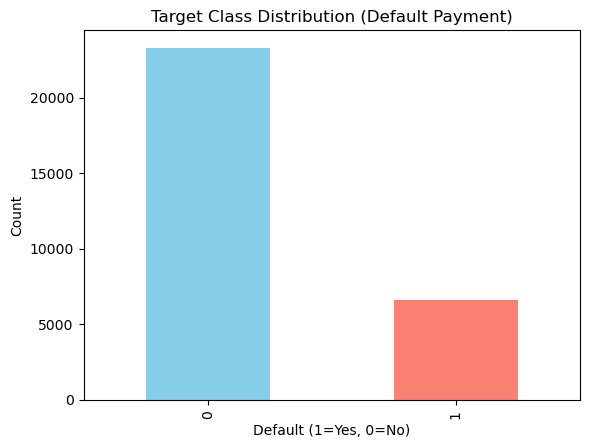


Model Accuracy: 0.7233333333333334

Confusion Matrix:
 [[223  75]
 [ 91 211]]

Best Parameters: {'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Model Accuracy: 0.7333333333333333

Confusion Matrix (Tuned Model):
 [[229  69]
 [ 91 211]]


In [16]:
#3.Implement Random Forest algorithm on customers' default payments data set. Given a set of features, predict the probability of a customer defaulting on a loan. The target variable is "default payment" (Yes=1; No=1)
#(download from here https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-random-forest-predict-credit-defaults).

#a) Import the required libraries
#b) Load the data set.
#c) Explore the data set – drop the ID column
#d) Analyze missing data - check for null values or other invalid input (use unique(), isnull(), len()- count missing data), comment on the values in EDUCATION and MARRIAGE columns, filter the rows where the EDUCATION and MARRIAGE columns have non-zero values
#e) check whether the target variable is balanced using a plot
#f) down sample the data - split the data based on those who defaulted on their loan and those who did not default on their loan by randomly selecting 1,000 samples from each category, and use resample()
#g) Hot encode the independent variables – isolate (drop() with copy()) independent variables, encode the data using get_dummies()
#h) Split the data set (downsampled data set)– train and test
#i) Classify accounts and evaluate the model – print accuracy and confusion matrix
#j) Optimize the model with hyperparameter tuning - n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_leaf_nodes, display the confusion matrix

# Random Forest on Credit Card Default Data
# -----------------------------------------

# a) Import required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt

# b) Load the dataset
df = pd.read_excel("Downloads/card.xls", header=1)  # ensure correct file name

# c) Explore the data – drop ID column
df = df.drop("ID", axis=1)

# d) Analyze missing data
print("Null values in dataset:\n", df.isnull().sum())

# Check unique values of EDUCATION and MARRIAGE
print("\nUnique values in EDUCATION:", df["EDUCATION"].unique())
print("Unique values in MARRIAGE:", df["MARRIAGE"].unique())

# Filter rows where EDUCATION and MARRIAGE columns have non-zero values
df = df[(df["EDUCATION"] != 0) & (df["MARRIAGE"] != 0)]

# e) Check whether the target variable is balanced using a plot
df["default payment next month"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Target Class Distribution (Default Payment)")
plt.xlabel("Default (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

# f) Down sample the data (1,000 from each category)
default_yes = df[df["default payment next month"] == 1]
default_no = df[df["default payment next month"] == 0]

default_yes_down = resample(default_yes, replace=False, n_samples=1000, random_state=42)
default_no_down = resample(default_no, replace=False, n_samples=1000, random_state=42)

df_downsampled = pd.concat([default_yes_down, default_no_down])

# g) One-hot encode independent variables
X = df_downsampled.drop("default payment next month", axis=1).copy()
y = df_downsampled["default payment next month"]
X = pd.get_dummies(X, drop_first=True)

# h) Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# i) Train Random Forest and evaluate
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# j) Hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_leaf_nodes": [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix (Tuned Model):\n", confusion_matrix(y_test, y_pred_best))


In [14]:
!pip install xlrd
